Max draw down of soft payouts: 17.108431819148265
% of positive clv: 0.5714285714285714
count    147.000000
mean       0.051051
std        0.327689
min       -0.712295
25%       -0.157551
50%        0.059173
75%        0.264461
max        0.998000
dtype: float64
Expected/Actual wins: 38.57326836473236/40
Win percentage: 0.272108843537415


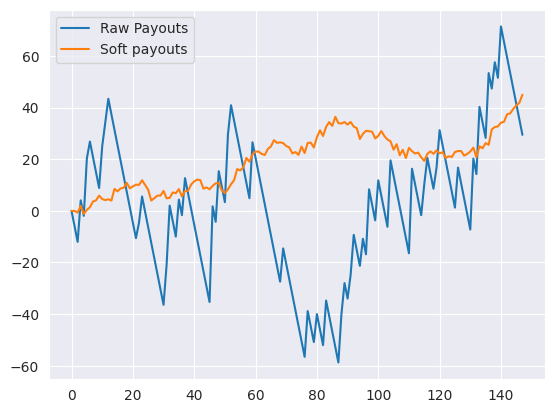

In [1]:
from util.stats_calculator import get_max_draw_down
from typing import List
from util.plot import plot_wealth_growth
import pandas as pd
from Model.Betting.evaluate import get_payout, LiveResult
import csv

bankroll_snapshots = [
    320.0
]

def row_to_live_result(row: List[str]) -> LiveResult:
    return LiveResult(float(row[0]), float(row[1]), row[3]=="True", stakes=float(row[2]))

with open('live_results.csv', newline='') as csvfile:
    live_result_reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    live_results = [row_to_live_result(row) for row in live_result_reader]

clvs = [result.clv for result in live_results]
soft_payouts = [result.clv * result.stakes for result in live_results]
print(f"Max draw down of soft payouts: {get_max_draw_down(soft_payouts)}")
positive_clv_percentage = len([1 for payout in soft_payouts if payout > 0]) / len(soft_payouts)
print(f"% of positive clv: {positive_clv_percentage}")

payouts = [get_payout(result, result.stakes) for result in live_results]
print(pd.Series(clvs).describe())

expected_wins = sum([1 / live_result.starting_odds for live_result in live_results])
n_wins = sum([1 for live_result in live_results if live_result.has_won])
print(f"Expected/Actual wins: {expected_wins}/{n_wins}")
print(f"Win percentage: {n_wins / len(live_results)}")

plot_wealth_growth(payouts, label="Raw Payouts")
plot_wealth_growth(soft_payouts, label="Soft payouts")

In [3]:
import os
for i in range(10):
    duration = 1  # seconds
    freq = 440  # Hz
    os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

In [1]:
import numpy as np

values = [1, 2, 3, 4, 5, 6]
np.percentile(values, 95)

5.75